### Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import wfdb

### Set Up Constants

In [2]:
DATA_DIR = Path("/Users/alykapasi/Desktop/data_synthesis/data/raw_data/")
RECORDS = ["100", "101", "102", "103", "104", "105", "106", "107", "108", "109",
           "111", "112", "113", "114", "115", "116", "117", "118", "119",
           "121", "122", "123", "124"]  # Using all 'normal' samples | 200+ are abnormal samples
WINDOW_SIZE = 360  # around 1 beat (1 sec @ 360Hz)

### Define Helper Functions

In [3]:
def load_record(record_path):
    rec = wfdb.rdrecord(record_path)
    ann = wfdb.rdann(record_path, "atr")
    signal = rec.p_signal[:, 0]  # first lead
    return signal, ann.sample, ann.symbol

def segment_beats(signal, ann_indices, window_size=250):
    beats = []
    for idx in ann_indices:
        start = idx - window_size // 2
        end = idx + window_size // 2
        if start >= 0 and end < len(signal):
            beat = signal[start:end]
            beats.append(beat)
    return beats

### Run Preprocessing

Loaded 48174 beats.


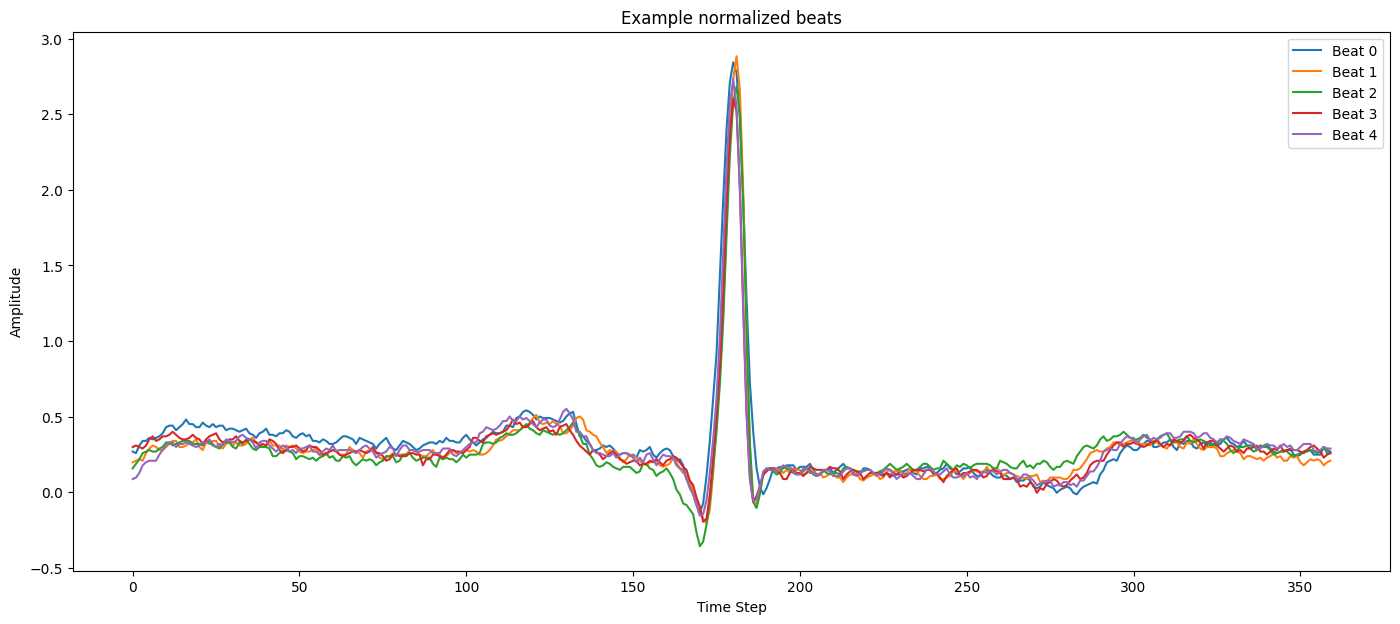

In [4]:
all_beats = []

for rec in RECORDS:
    path = str(DATA_DIR / rec)
    signal, ann_idx, ann_sym = load_record(path)
    beats = segment_beats(signal, ann_idx, window_size=WINDOW_SIZE)
    all_beats.extend(beats)

# Normalize and convert to tensor
all_beats = np.array(all_beats).astype(np.float32)
mean, std = all_beats.mean(), all_beats.std()
all_beats = (all_beats - mean) / std

print(f"Loaded {len(all_beats)} beats.")

# Preview some beats
plt.figure(figsize=(17, 7))
for i in range(5):
    plt.plot(all_beats[i], label=f'Beat {i}')
plt.legend()
plt.title("Example normalized beats")
plt.ylabel("Amplitude")
plt.xlabel("Time Step")
plt.show()

### Save Preprocessed Beats

In [5]:
# Save to .npy for reuse
np.save("../data/preprocessed_beats.npy", all_beats)